In [1]:
import pandas as pd
import numpy as np

In [2]:
# File path
data = pd.read_csv("~/Downloads/FeedGrains.csv")

In [3]:
data = data.drop(['SC_Group_ID', 'SC_GroupCommod_ID', 'SC_Commodity_ID', 
                  'SC_Attribute_ID', 'SC_Unit_ID', 'SortOrder', 
                  'SC_Frequency_ID', 'Timeperiod_ID', 'SC_Geography_ID'], axis=1)

In [4]:
# Filter the dataset to keep only rows with 'Monthly' in SC_Frequency_Desc
data = data[data['SC_Frequency_Desc'] == 'Monthly']

# Reset index after filtering (optional)
data.reset_index(drop=True, inplace=True)

# Display the first few rows to verify
data.head()

,SC_Group_Desc,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,SC_Frequency_Desc,Timeperiod_Desc,Amount
0,Exports and imports,Corn,South Korea,Corn products,"Imports, to U.S. from specified source","1,000 metric tons",1996,Monthly,Jan,0.011913
1,Exports and imports,Corn,South Korea,Corn products,"Imports, to U.S. from specified source","1,000 metric tons",1996,Monthly,Feb,0.002170
2,Exports and imports,Corn,South Korea,Corn products,"Imports, to U.S. from specified source","1,000 metric tons",1996,Monthly,Mar,0.013735
3,Exports and imports,Corn,South Korea,Corn products,"Imports, to U.S. from specified source","1,000 metric tons",1996,Monthly,Apr,0.015224
4,Exports and imports,Corn,South Korea,Corn products,"Imports, to U.S. from specified source","1,000 metric tons",1996,Monthly,May,0.015686


In [5]:
# Create a Season column based on Timeperiod_Desc
data['Season'] = data['Timeperiod_Desc'].apply(lambda x: 'Winter' if x in ['Dec', 'Jan', 'Feb'] else 
                                                         'Spring' if x in ['Mar', 'Apr', 'May'] else 
                                                         'Summer' if x in ['Jun', 'Jul', 'Aug'] else 
                                                         'Fall')

# Display unique values to verify
print(data['Season'].unique())

['Winter' 'Spring' 'Summer' 'Fall']


In [6]:
data = data.drop(['SC_Frequency_Desc'], axis=1)

In [7]:
data = data.drop(['SC_Group_Desc', 'SC_GroupCommod_Desc'], axis=1)

In [8]:
# Remove leading and trailing white spaces from the column
data['SC_GeographyIndented_Desc'] = data['SC_GeographyIndented_Desc'].str.strip()

# Display unique values in the updated column
data['SC_GeographyIndented_Desc'].unique()

array(['South Korea', 'Hong Kong', 'Taiwan', 'Japan', 'Kosovo',
       'Australia (No Islands)', 'Papua New Guinea',
       'New Zealand, No Islands (=Old Code 6140)', 'Norfolk Island',
       'Cocos (Keeling) Islands', 'Christmas Island(Indian Ocean)',
       'Cook Islands', 'Tokelau Islands', 'Niue', 'Samoa',
       'Solomon Islands', 'Kiribati', 'New Caledonia', 'French Polynesia',
       'Marshall Islands', 'Micronesia, Federated States', 'Palau',
       'Fiji', 'Tonga', 'Morocco', 'Egypt', 'Algeria', 'Sudan',
       'Equatorial Guinea', 'Mauritania', 'Cameroon', 'Western Sahara',
       'Senegal', 'Mali', 'Guinea', 'Sierra Leone', 'Ivory Coast',
       'Ghana', 'Tunisia', 'The Gambia', 'Niger', 'Togo', 'Nigeria',
       'Libya', 'Central African Republic', 'Gabon', 'Chad', 'St Helena',
       'Burkina Faso', 'Benin', 'Angola', 'Congo(Brazzville)',
       'Guinea-Bissau', 'Cape Verde Islands', 'Sao Tome And Principe',
       'Liberia', 'Congo(Kinshasa)', 'Burundi', 'Rwanda', 'Somal

In [9]:
# Mapping USA-related names to 'United States of America'
usa_mapping = {
    'Central America': 'United States of America',
    'United States': 'United States of America',
    'United States of America': 'United States of America',
    'USA': 'United States of America',
    'U.S.': 'United States of America',
    'U.S.A.': 'United States of America',
    'America': 'United States of America',
    'North America': 'United States of America',
    'United States of America (US)': 'United States of America',
    'U.S. (United States)': 'United States of America',
    'U.S.A': 'United States of America',
    'U.S.A. (United States of America)': 'United States of America',
    'US (United States)': 'United States of America',
    'United States (US)': 'United States of America',
    'America (USA)': 'United States of America',
    'U.S. - Golden Triangle, MT': 'United States of America',
    'U.S. - Minneapolis, MN': 'United States of America',
    'World less U.S.': 'United States of America',
    'U.S. - Midwest': 'United States of America',
    'U.S. - Central IL': 'United States of America',
    'U.S. - Gulf ports, LA': 'United States of America',
    'U.S. - St Louis, MO': 'United States of America',
    'U.S. - AR points': 'United States of America',
    'U.S. - Omaha, NE': 'United States of America',
    'U.S. - Chicago, IL': 'United States of America',
    'U.S. - Kansas City, MO': 'United States of America',
    'U.S. - Domestic, East Coast': 'United States of America',
    'U.S. - Lawrenceburg, IN': 'United States of America',
    'U.S. - IL points, IL': 'United States of America',
    'U.S. - Central US': 'United States of America',
    'U.S. - Toledo, OH': 'United States of America',
    'U.S. - AR': 'United States of America',
    'U.S. - Memphis, TN': 'United States of America',
    'U.S. - New York, NY': 'United States of America',
}

In [10]:
russia_mapping = {
    'Russia': 'Russia',
    'Russian Federation': 'Russia',
    'Russian Federation, Begins 2/1992': 'Russia',
    'Former Ussr, Begins 1/1989 & Ends 1/1993': 'Russia',
    'Former Soviet Union-12': 'Russia',
    'USSR': 'Russia',
    'Union of Soviet Socialist Republics': 'Russia'
}

In [11]:
australia_mapping = {
    'Australia (No Islands)': 'Australia',
    'Norfolk Island': 'Australia',
    'Cocos (Keeling) Islands': 'Australia',
    'Christmas Island (Indian Ocean)': 'Australia'
}

In [12]:
germany_mapping = {
    'Germany, Fed. Republic; United, Begins 1': 'Germany',
    'German Democratic Republic, Ends 9/1990': 'Germany'
}

In [13]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:", missing_values)

# Drop rows with significant missing data or fill missing values
data = data.dropna()  # Example: Drop missing rows

Missing Values: SC_GeographyIndented_Desc    0
SC_Commodity_Desc            0
SC_Attribute_Desc            0
SC_Unit_Desc                 0
Year_ID                      0
Timeperiod_Desc              0
Amount                       0
Season                       0
dtype: int64


In [14]:
filtered_data = data[data['SC_GeographyIndented_Desc'].str.contains('U.S.', na=False)]

In [15]:
filtered_data2 = filtered_data[
    filtered_data['SC_Attribute_Desc'] == 'Prices, market'
]

In [16]:
# Filter the data for each pricing unit
dollars_per_bushel = filtered_data2[filtered_data2['SC_Unit_Desc'] == 'Dollars per bushel']
dollars_per_cwt = filtered_data2[filtered_data2['SC_Unit_Desc'] == 'Dollars per cwt']
cents_per_pound = filtered_data2[filtered_data2['SC_Unit_Desc'] == 'Cents per pound']

# Check the first few rows for each to verify
print(dollars_per_bushel.head())
print(dollars_per_cwt.head())
print(cents_per_pound.head())

        SC_GeographyIndented_Desc      SC_Commodity_Desc SC_Attribute_Desc  \
53237  U.S. - Golden Triangle, MT  Barley, No. 3 malting    Prices, market   
53238  U.S. - Golden Triangle, MT  Barley, No. 3 malting    Prices, market   
53239  U.S. - Golden Triangle, MT  Barley, No. 3 malting    Prices, market   
53297  U.S. - Golden Triangle, MT     Barley, No. 2 feed    Prices, market   
53298  U.S. - Golden Triangle, MT     Barley, No. 2 feed    Prices, market   

             SC_Unit_Desc  Year_ID Timeperiod_Desc  Amount  Season  
53237  Dollars per bushel     2020             Aug    7.41  Summer  
53238  Dollars per bushel     2020             Sep    7.25    Fall  
53239  Dollars per bushel     2020             Oct    7.28    Fall  
53297  Dollars per bushel     2020             Aug    5.55  Summer  
53298  Dollars per bushel     2020             Sep    5.52    Fall  
      SC_GeographyIndented_Desc SC_Commodity_Desc SC_Attribute_Desc  \
72111            U.S. - Midwest       Corn sta

In [17]:
import pandas as pd

# Define mapping of month names to numbers
month_mapping = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}

# Convert month names to numbers safely using .loc[]
dollars_per_bushel.loc[:, 'Month'] = dollars_per_bushel['Timeperiod_Desc'].map(month_mapping)

# Ensure no missing months
print(dollars_per_bushel[['Timeperiod_Desc', 'Month']].drop_duplicates())

# Drop rows where month mapping failed
dollars_per_bushel = dollars_per_bushel.dropna(subset=['Month'])

# Convert to integer (in case it's float due to NaN issues)
dollars_per_bushel.loc[:, 'Month'] = dollars_per_bushel['Month'].astype(int)

# Create a Date column with the first day of the month
dollars_per_bushel.loc[:, 'Date'] = pd.to_datetime(
    dollars_per_bushel[['Year_ID', 'Month']].assign(Day=1)
)

# Sort the dataframe by date
dollars_per_bushel = dollars_per_bushel.sort_values(by='Date')

# Check the new date column
print(dollars_per_bushel[['Date', 'Amount']].head())


      Timeperiod_Desc  Month
53237             Aug      8
53238             Sep      9
53239             Oct     10
53300             Nov     11
53301             Dec     12
53302             Jan      1
53303             Feb      2
53304             Mar      3
53305             Apr      4
53306             May      5
53307             Jun      6
53308             Jul      7


C:\Users\abhin\AppData\Local\Temp\ipykernel_20104\1709726358.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dollars_per_bushel.loc[:, 'Month'] = dollars_per_bushel['Timeperiod_Desc'].map(month_mapping)


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [year] is missing

In [52]:
import pandas as pd

# Ensure 'Year_ID' is properly formatted and exists
if 'Year_ID' not in dollars_per_bushel.columns:
    raise ValueError("Column 'Year_ID' is missing from the DataFrame")

# Convert Year_ID to integer (if it's not already)
dollars_per_bushel.loc[:, 'Year_ID'] = dollars_per_bushel['Year_ID'].astype(int)

# Convert Month to integer (if needed)
dollars_per_bushel.loc[:, 'Month'] = dollars_per_bushel['Month'].astype(int)

# Ensure no missing values before creating datetime
print(dollars_per_bushel[['Year_ID', 'Month']].isna().sum())  # Check for NaNs

# Create Date column with the first day of the month
dollars_per_bushel.loc[:, 'Date'] = pd.to_datetime(
    dollars_per_bushel[['Year_ID', 'Month']].assign(Day=1)
)

# Sort the dataframe by date
dollars_per_bushel = dollars_per_bushel.sort_values(by='Date')

# Display the first few rows to verify
print(dollars_per_bushel[['Date', 'Amount']].head())


Year_ID    0
Month      0
dtype: int64


ValueError: to assemble mappings requires at least that [year, month, day] be specified: [year] is missing

In [54]:
dollars_per_bushel

,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season,Month
53237,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Aug,7.41,Summer,8
53238,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Sep,7.25,Fall,9
53239,"U.S. - Golden Triangle, MT","Barley, No. 3 malting","Prices, market",Dollars per bushel,2020,Oct,7.28,Fall,10
53297,"U.S. - Golden Triangle, MT","Barley, No. 2 feed","Prices, market",Dollars per bushel,2020,Aug,5.55,Summer,8
53298,"U.S. - Golden Triangle, MT","Barley, No. 2 feed","Prices, market",Dollars per bushel,2020,Sep,5.52,Fall,9
...,...,...,...,...,...,...,...,...,...
87674,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1980,Aug,3.27,Summer,8
87675,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1980,Sep,3.63,Fall,9
87676,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1980,Oct,3.80,Fall,10
87677,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1980,Nov,3.88,Fall,11


In [56]:
# Create a string for Year-Month with the first day of each month
dollars_per_bushel['Date'] = pd.to_datetime(
    dollars_per_bushel['Year_ID'].astype(str) + '-' + dollars_per_bushel['Month'].astype(str) + '-01',
    format='%Y-%m-%d'
)


In [58]:
print(dollars_per_bushel[['Year_ID', 'Month', 'Date']].head())
print(dollars_per_bushel['Date'].isnull().sum())  # Ensure there are no NaT values


       Year_ID  Month       Date
53237     2020      8 2020-08-01
53238     2020      9 2020-09-01
53239     2020     10 2020-10-01
53297     2020      8 2020-08-01
53298     2020      9 2020-09-01
0


In [60]:
dollars_per_bushel = dollars_per_bushel.sort_values(by='Date')

In [62]:
dollars_per_bushel

,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season,Month,Date
70526,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,1975,Jun,1.59,Summer,6,1975-06-01
69823,"U.S. - Minneapolis, MN","Barley, No. 2 feed","Prices, market",Dollars per bushel,1975,Jun,1.67,Summer,6,1975-06-01
87612,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1975,Jun,3.97,Summer,6,1975-06-01
70527,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,1975,Jul,1.59,Summer,7,1975-07-01
87613,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1975,Jul,3.83,Summer,7,1975-07-01
...,...,...,...,...,...,...,...,...,...,...
76699,"U.S. - St Louis, MO","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,4.50,Fall,11,2024-11-01
71072,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,2024,Nov,4.17,Fall,11,2024-11-01
75943,"U.S. - Gulf ports, LA","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,5.11,Fall,11,2024-11-01
85004,"U.S. - Toledo, OH","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,4.04,Fall,11,2024-11-01


In [64]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
adf_result = adfuller(dollars_per_bushel['Amount'].dropna())

print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -2.561159373148849
p-value: 0.10129344625515163


In [65]:
# Check if the index has duplicate labels
duplicates = dollars_per_bushel.index.duplicated().sum()
print(f"Number of duplicate index labels: {duplicates}")

Number of duplicate index labels: 0


In [68]:
# Reset the index to avoid issues with duplicates
dollars_per_bushel.reset_index(drop=True, inplace=True)


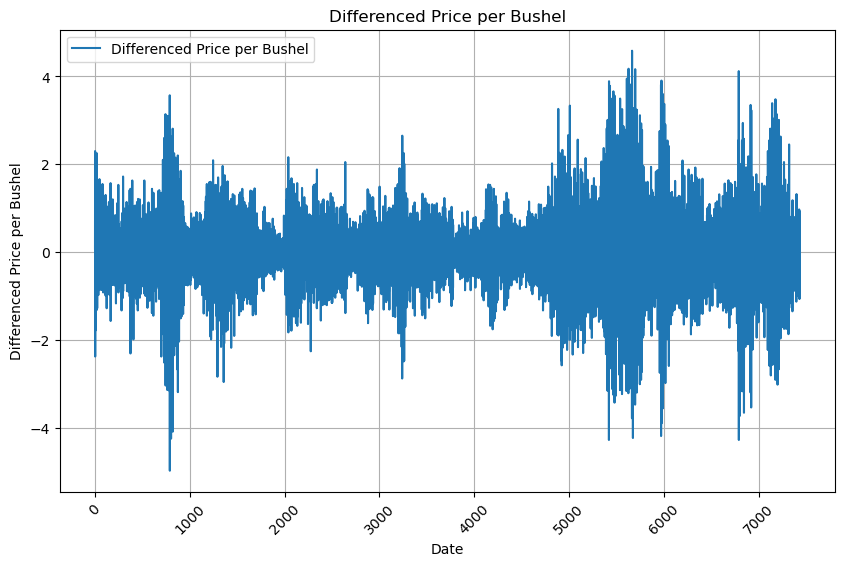

In [72]:
import matplotlib.pyplot as plt
# Take the first difference to remove trend
dollars_per_bushel['Amount_diff'] = dollars_per_bushel['Amount'].diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 6))
plt.plot(dollars_per_bushel['Amount_diff'], label='Differenced Price per Bushel')
plt.title('Differenced Price per Bushel')
plt.xlabel('Date')
plt.ylabel('Differenced Price per Bushel')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [74]:
# ADF test on the differenced series
adf_result_diff = adfuller(dollars_per_bushel['Amount_diff'].dropna())

# Output the ADF statistic and p-value
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"p-value: {adf_result_diff[1]}")


ADF Statistic: -15.405584510713112
p-value: 3.1729134447891928e-28


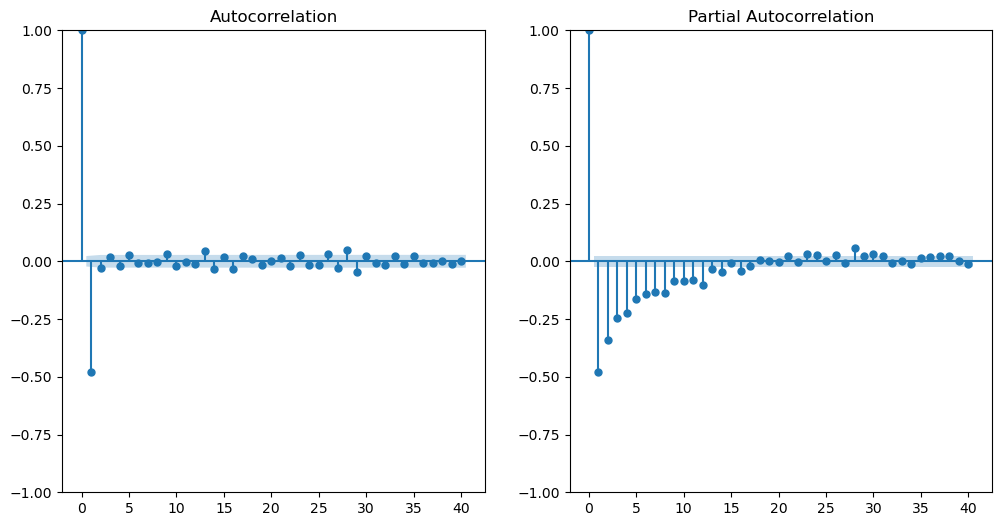

In [76]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(dollars_per_bushel['Amount_diff'].dropna(), lags=40, ax=plt.gca())
plt.subplot(122)
plot_pacf(dollars_per_bushel['Amount_diff'].dropna(), lags=40, ax=plt.gca())
plt.show()


In [78]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (p, d, q)
model = ARIMA(dollars_per_bushel['Amount'], order=(1, 1, 1))  # p=1, d=1, q=1
fitted_model = model.fit()

# Model summary
print(fitted_model.summary())


                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                 7431
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6403.320
Date:                Wed, 12 Feb 2025   AIC                          12812.640
Time:                        15:08:07   BIC                          12833.380
Sample:                             0   HQIC                         12819.765
                               - 7431                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0189      0.011     -1.752      0.080      -0.040       0.002
ma.L1         -0.8896      0.005   -190.144      0.000      -0.899      -0.880
sigma2         0.3281      0.003    130.315      0.0

In [81]:
#refitting the model
# Fit ARIMA(0, 1, 1) model
model_refined = ARIMA(dollars_per_bushel['Amount'], order=(0, 1, 1))  # No AR term
fitted_model_refined = model_refined.fit()

# Model summary
print(fitted_model_refined.summary())


                               SARIMAX Results                                
Dep. Variable:                 Amount   No. Observations:                 7431
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -6404.464
Date:                Wed, 12 Feb 2025   AIC                          12812.927
Time:                        15:08:11   BIC                          12826.754
Sample:                             0   HQIC                         12817.677
                               - 7431                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8922      0.004   -215.794      0.000      -0.900      -0.884
sigma2         0.3282      0.002    131.544      0.000       0.323       0.333
Ljung-Box (L1) (Q):                   1.92   Jarque-

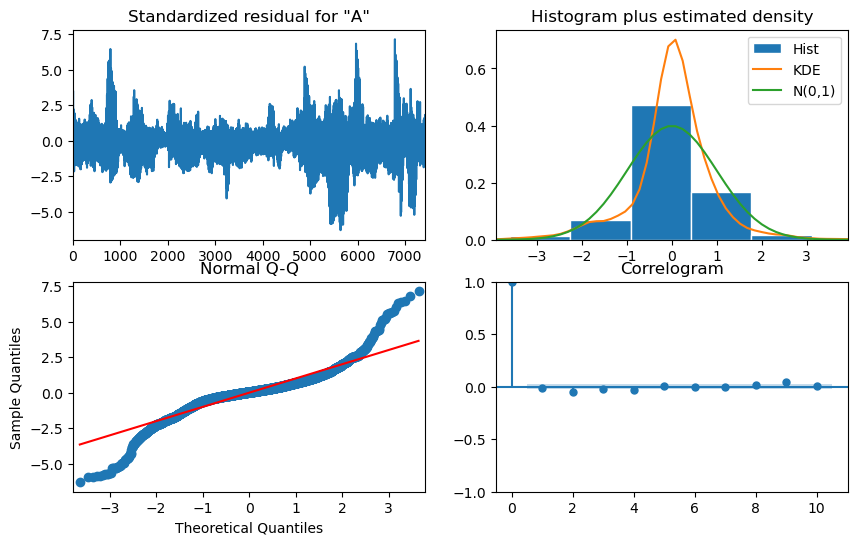

In [82]:
# Residual diagnostics for the refined model
fitted_model_refined.plot_diagnostics(figsize=(10, 6))
plt.show()


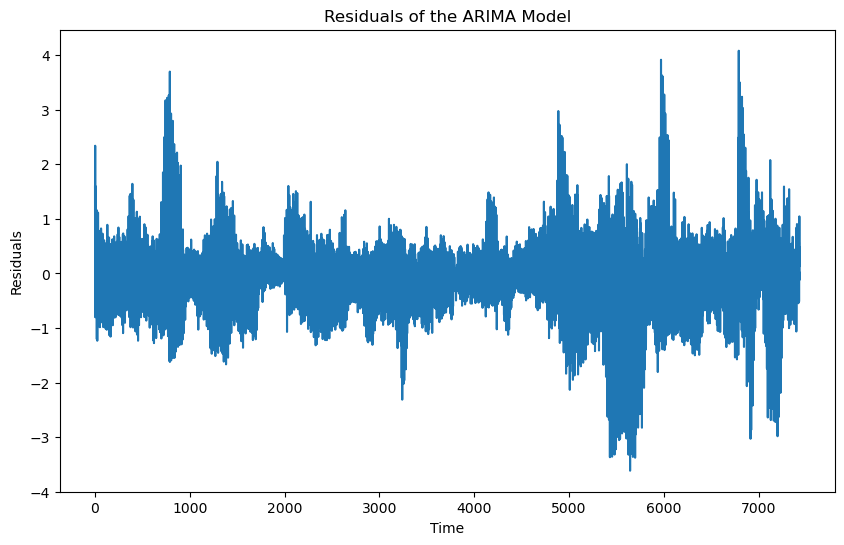

In [85]:
# Check residuals for any patterns
residuals = fitted_model.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()


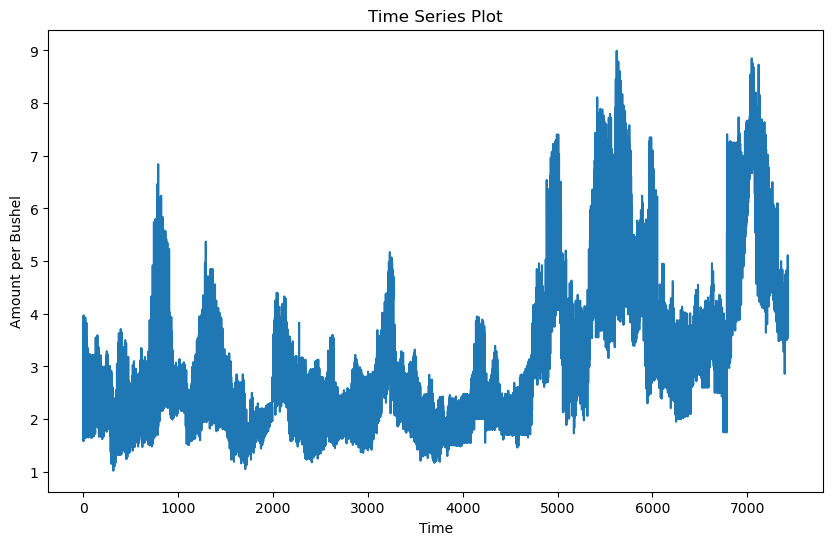

In [87]:
plt.figure(figsize=(10, 6))
plt.plot(dollars_per_bushel['Amount'])
plt.title('Time Series Plot')
plt.xlabel('Time')
plt.ylabel('Amount per Bushel')
plt.show()


In [89]:
from statsmodels.tsa.stattools import adfuller

# Apply the Augmented Dickey-Fuller test
adf_result = adfuller(dollars_per_bushel['Amount'])

# Print the ADF test statistic and p-value
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print(f"Critical Values: {adf_result[4]}")


ADF Statistic: -2.561159373148849
p-value: 0.10129344625515163
Critical Values: {'1%': -3.431234115439372, '5%': -2.8619307113084043, '10%': -2.5669779712996212}


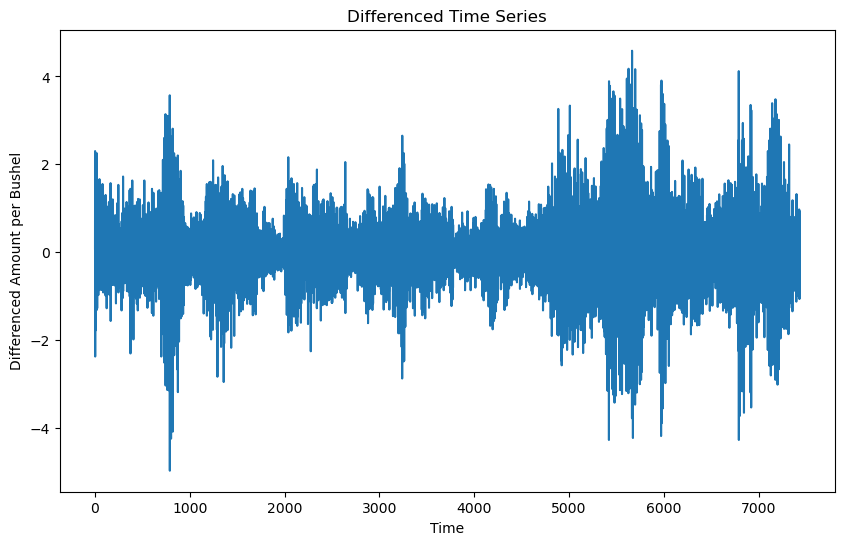

ADF Statistic: -15.405584510713112
p-value: 3.1729134447891928e-28
Critical Values: {'1%': -3.431234115439372, '5%': -2.8619307113084043, '10%': -2.5669779712996212}


In [91]:
# Apply first difference to make the data stationary
dollars_per_bushel['Amount_diff'] = dollars_per_bushel['Amount'].diff()

# Drop the first row with NaN after differencing
dollars_per_bushel.dropna(inplace=True)

# Visualize the differenced data
plt.figure(figsize=(10, 6))
plt.plot(dollars_per_bushel['Amount_diff'])
plt.title('Differenced Time Series')
plt.xlabel('Time')
plt.ylabel('Differenced Amount per Bushel')
plt.show()

# Reapply ADF test on differenced data
adf_result_diff = adfuller(dollars_per_bushel['Amount_diff'])
print(f"ADF Statistic: {adf_result_diff[0]}")
print(f"p-value: {adf_result_diff[1]}")
print(f"Critical Values: {adf_result_diff[4]}")


In [93]:
dollars_per_bushel


,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season,Month,Date,Amount_diff
1,"U.S. - Minneapolis, MN","Barley, No. 2 feed","Prices, market",Dollars per bushel,1975,Jun,1.67,Summer,6,1975-06-01,0.08
2,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1975,Jun,3.97,Summer,6,1975-06-01,2.30
3,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,1975,Jul,1.59,Summer,7,1975-07-01,-2.38
4,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1975,Jul,3.83,Summer,7,1975-07-01,2.24
5,"U.S. - Minneapolis, MN","Barley, No. 2 feed","Prices, market",Dollars per bushel,1975,Jul,2.04,Summer,7,1975-07-01,-1.79
...,...,...,...,...,...,...,...,...,...,...,...
7426,"U.S. - St Louis, MO","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,4.50,Fall,11,2024-11-01,0.97
7427,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,2024,Nov,4.17,Fall,11,2024-11-01,-0.33
7428,"U.S. - Gulf ports, LA","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,5.11,Fall,11,2024-11-01,0.94
7429,"U.S. - Toledo, OH","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,4.04,Fall,11,2024-11-01,-1.07


In [95]:
# Create a 'Date' column by combining 'Year_ID' and 'Timeperiod_Desc'
dollars_per_bushel['Date'] = pd.to_datetime(dollars_per_bushel['Year_ID'].astype(str) + ' ' + dollars_per_bushel['Timeperiod_Desc'], format='%Y %b')

# Set the 'Date' column as the index
dollars_per_bushel.set_index('Date', inplace=True)


In [97]:
dollars_per_bushel

,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season,Month,Amount_diff
Date,,,,,,,,,,
1975-06-01,"U.S. - Minneapolis, MN","Barley, No. 2 feed","Prices, market",Dollars per bushel,1975,Jun,1.67,Summer,6,0.08
1975-06-01,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1975,Jun,3.97,Summer,6,2.30
1975-07-01,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,1975,Jul,1.59,Summer,7,-2.38
1975-07-01,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1975,Jul,3.83,Summer,7,2.24
1975-07-01,"U.S. - Minneapolis, MN","Barley, No. 2 feed","Prices, market",Dollars per bushel,1975,Jul,2.04,Summer,7,-1.79
...,...,...,...,...,...,...,...,...,...,...
2024-11-01,"U.S. - St Louis, MO","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,4.50,Fall,11,0.97
2024-11-01,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,2024,Nov,4.17,Fall,11,-0.33
2024-11-01,"U.S. - Gulf ports, LA","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,5.11,Fall,11,0.94


In [99]:
dollars_per_bushel.index = pd.to_datetime(dollars_per_bushel.index).to_period('M')


In [101]:
print(dollars_per_bushel.index.freq)


<MonthEnd>


In [103]:
pip install pmdarima


Note: you may need to restart the kernel to use updated packages.


In [105]:
dollars_per_bushel

,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season,Month,Amount_diff
Date,,,,,,,,,,
1975-06,"U.S. - Minneapolis, MN","Barley, No. 2 feed","Prices, market",Dollars per bushel,1975,Jun,1.67,Summer,6,0.08
1975-06,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1975,Jun,3.97,Summer,6,2.30
1975-07,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,1975,Jul,1.59,Summer,7,-2.38
1975-07,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1975,Jul,3.83,Summer,7,2.24
1975-07,"U.S. - Minneapolis, MN","Barley, No. 2 feed","Prices, market",Dollars per bushel,1975,Jul,2.04,Summer,7,-1.79
...,...,...,...,...,...,...,...,...,...,...
2024-11,"U.S. - St Louis, MO","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,4.50,Fall,11,0.97
2024-11,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,2024,Nov,4.17,Fall,11,-0.33
2024-11,"U.S. - Gulf ports, LA","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,5.11,Fall,11,0.94


In [ ]:
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd

# Set the number of periods to forecast (24 months)
forecast_steps = 24

# Automatically find the best ARIMA model
model_auto = pm.auto_arima(dollars_per_bushel['Amount'], seasonal=True, m=12, 
                           stepwise=True, trace=True)

# Print the summary of the chosen model
print(model_auto.summary())

# Make the forecast for the next 24 months
forecast_auto = model_auto.predict(n_periods=forecast_steps)

# Plot the actual data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(dollars_per_bushel.index, dollars_per_bushel['Amount'], label='Actual Data')

# Generate the forecast index (next 24 months)
forecast_index = pd.date_range(start=dollars_per_bushel.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Plot the forecasted values
plt.plot(forecast_index, forecast_auto, color='red', label='Forecasted Data')

# Adding title and labels
plt.title('Forecasted Prices of Barley, Corn, etc. over Time')
plt.xlabel('Date')
plt.ylabel('Amount (Dollars per Bushel)')

# Show the legend and grid
plt.legend()
plt.grid(True)

# Display the plot
plt.show()


In [149]:
dollars_per_bushel.index = pd.to_datetime(dollars_per_bushel.index)

In [145]:
dollars_per_bushel.index = dollars_per_bushel.index.to_timestamp()


In [147]:
dollars_per_bushel

,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Season,Month,Amount_diff
Date,,,,,,,,,,
1975-06-01,"U.S. - Minneapolis, MN","Barley, No. 2 feed","Prices, market",Dollars per bushel,1975,Jun,1.67,Summer,6,0.08
1975-06-01,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1975,Jun,3.97,Summer,6,2.30
1975-07-01,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,1975,Jul,1.59,Summer,7,-2.38
1975-07-01,"U.S. - Minneapolis, MN","Barley, No. 3 malting","Prices, market",Dollars per bushel,1975,Jul,3.83,Summer,7,2.24
1975-07-01,"U.S. - Minneapolis, MN","Barley, No. 2 feed","Prices, market",Dollars per bushel,1975,Jul,2.04,Summer,7,-1.79
...,...,...,...,...,...,...,...,...,...,...
2024-11-01,"U.S. - St Louis, MO","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,4.50,Fall,11,0.97
2024-11-01,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,2024,Nov,4.17,Fall,11,-0.33
2024-11-01,"U.S. - Gulf ports, LA","Corn, No. 2 yellow","Prices, market",Dollars per bushel,2024,Nov,5.11,Fall,11,0.94


In [111]:
# Select only numeric columns for aggregation
numeric_columns = dollars_per_bushel.select_dtypes(include=['number']).columns
dollars_per_bushel_numeric = dollars_per_bushel[numeric_columns]

# Aggregate by grouping on the index and calculating the mean for numeric columns
dollars_per_bushel_aggregated = dollars_per_bushel_numeric.groupby(dollars_per_bushel.index).mean()


In [113]:
# Aggregating non-numeric columns with 'first' or 'last', or you can use 'mode' to get the most frequent value
non_numeric_columns = dollars_per_bushel.select_dtypes(exclude=['number']).columns
dollars_per_bushel_non_numeric = dollars_per_bushel[non_numeric_columns]

# You can aggregate non-numeric columns by taking the 'first' value in each group (or another method based on your needs)
dollars_per_bushel_non_numeric_aggregated = dollars_per_bushel_non_numeric.groupby(dollars_per_bushel.index).first()

# Combine numeric and non-numeric aggregations
final_aggregated_data = pd.concat([dollars_per_bushel_aggregated, dollars_per_bushel_non_numeric_aggregated], axis=1)


In [115]:
dollars_per_bushel_aggregated

,Year_ID,Amount,Month,Amount_diff
Date,,,,
1975-06,1975.0,2.820000,6.0,1.190000
1975-07,1975.0,2.486667,7.0,-0.643333
1975-08,1975.0,2.706667,8.0,0.243333
1975-09,1975.0,2.966154,9.0,0.010769
1975-10,1975.0,2.754615,10.0,-0.006154
...,...,...,...,...
2024-07,2024.0,3.953000,7.0,0.048000
2024-08,2024.0,3.733000,8.0,-0.114000
2024-09,2024.0,3.958333,9.0,0.083333


In [117]:
final_aggregated_data

,Year_ID,Amount,Month,Amount_diff,SC_GeographyIndented_Desc,SC_Commodity_Desc,SC_Attribute_Desc,SC_Unit_Desc,Timeperiod_Desc,Season
Date,,,,,,,,,,
1975-06,1975.0,2.820000,6.0,1.190000,"U.S. - Minneapolis, MN","Barley, No. 2 feed","Prices, market",Dollars per bushel,Jun,Summer
1975-07,1975.0,2.486667,7.0,-0.643333,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,Jul,Summer
1975-08,1975.0,2.706667,8.0,0.243333,"U.S. - Minneapolis, MN","Oats, No. 2 white heavy","Prices, market",Dollars per bushel,Aug,Summer
1975-09,1975.0,2.966154,9.0,0.010769,"U.S. - Omaha, NE","Corn, No. 2 yellow","Prices, market",Dollars per bushel,Sep,Fall
1975-10,1975.0,2.754615,10.0,-0.006154,"U.S. - Minneapolis, MN","Corn, No. 2 yellow","Prices, market",Dollars per bushel,Oct,Fall
...,...,...,...,...,...,...,...,...,...,...
2024-07,2024.0,3.953000,7.0,0.048000,"U.S. - St Louis, MO","Corn, No. 2 yellow","Prices, market",Dollars per bushel,Jul,Summer
2024-08,2024.0,3.733000,8.0,-0.114000,U.S. - Central IL,"Corn, No. 2 yellow","Prices, market",Dollars per bushel,Aug,Summer
2024-09,2024.0,3.958333,9.0,0.083333,"U.S. - Golden Triangle, MT","Barley, No. 2 feed","Prices, market",Dollars per bushel,Sep,Fall


C:\Users\abhin\AppData\Local\Temp\ipykernel_20104\205582796.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  predicted_values.index = pd.date_range(start=dollars_per_bushel_aggregated.index[-1], periods=12, freq='M')


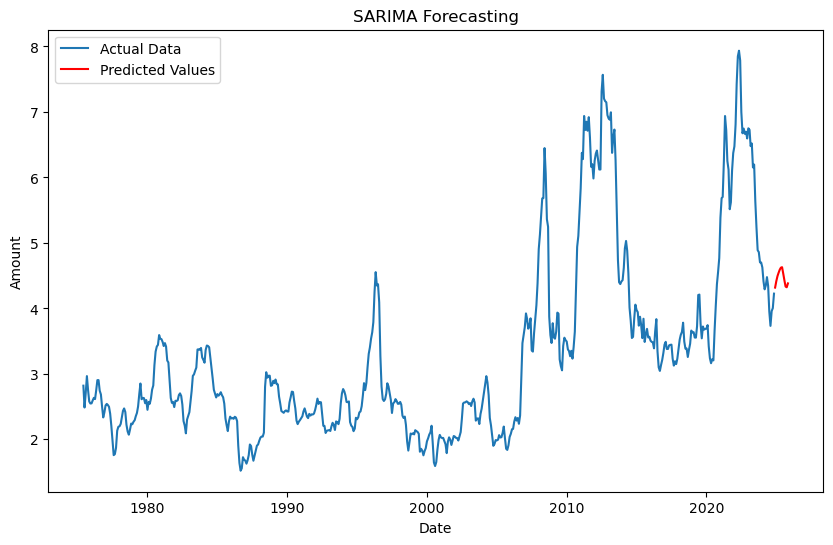

In [166]:
if isinstance(dollars_per_bushel_aggregated.index, pd.PeriodIndex):
    dollars_per_bushel_aggregated.index = dollars_per_bushel_aggregated.index.to_timestamp()
predicted_values.index = pd.date_range(start=dollars_per_bushel_aggregated.index[-1], periods=12, freq='M')
plt.figure(figsize=(10,6))
plt.plot(dollars_per_bushel_aggregated.index, dollars_per_bushel_aggregated['Amount'], label='Actual Data')
plt.plot(predicted_values.index, predicted_values, label='Predicted Values', color='red')
plt.legend()
plt.title("SARIMA Forecasting")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()


In [153]:
# Step 1: Extract actual values for comparison (taking the last 12 months from the dataset)
y_actual = dollars_per_bushel_aggregated['Amount'][-12:].values  # Last 12 months of actual data

# Step 2: Use the predicted values from the forecast
y_pred = predicted_values.values  # Predicted values from the SARIMA forecast


In [155]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Step 3: Calculate MAE, MSE, RMSE, R²
mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

# Step 4: Calculate MAPE
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

# Print the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}')


Mean Absolute Error (MAE): 0.3102968929693381
Mean Squared Error (MSE): 0.12575046238383053
Root Mean Squared Error (RMSE): 0.3546131164858832
R-squared (R²): -0.5974722040549154
Mean Absolute Percentage Error (MAPE): 7.515892629601709


In [157]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(dollars_per_bushel_aggregated['Amount'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])


ADF Statistic: -2.7807048991771186
p-value: 0.06108323254580783


In [159]:
# Apply first-order differencing
dollars_per_bushel_diff = dollars_per_bushel_aggregated['Amount'].diff().dropna()

# Check stationarity again
result_diff = adfuller(dollars_per_bushel_diff)
print("ADF Statistic:", result_diff[0])
print("p-value:", result_diff[1])


ADF Statistic: -6.014798806977378
p-value: 1.542820650939957e-07


In [200]:
# Re-fit SARIMA model on the differenced data
sarima_model = SARIMAX(dollars_per_bushel_aggregated['Amount'],
                       order=(5, 1, 2),  # Non-seasonal parameters
                       seasonal_order=(1, 1, 1, 12),  # Seasonal parameters (s=12 for monthly data)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

sarima_result = sarima_model.fit(disp=False)

# Forecast future values
predictions = sarima_result.get_forecast(steps=12)
predicted_values = predictions.predicted_mean

# Print predictions
print(predicted_values)


2024-12-01    4.331779
2025-01-01    4.423803
2025-02-01    4.509088
2025-03-01    4.554619
2025-04-01    4.604689
2025-05-01    4.634348
2025-06-01    4.641401
2025-07-01    4.543316
2025-08-01    4.440231
2025-09-01    4.343950
2025-10-01    4.333264
2025-11-01    4.392341
Freq: MS, Name: predicted_mean, dtype: float64


C:\Users\abhin\AppData\Local\Temp\ipykernel_20104\375485264.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  predicted_values.index = pd.date_range(start=dollars_per_bushel_aggregated.index[-1], periods=12, freq='M')
C:\Users\abhin\AppData\Local\Temp\ipykernel_20104\375485264.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  predicted_values.index = pd.date_range(start=dollars_per_bushel_aggregated.index[-1], periods=12, freq='M')


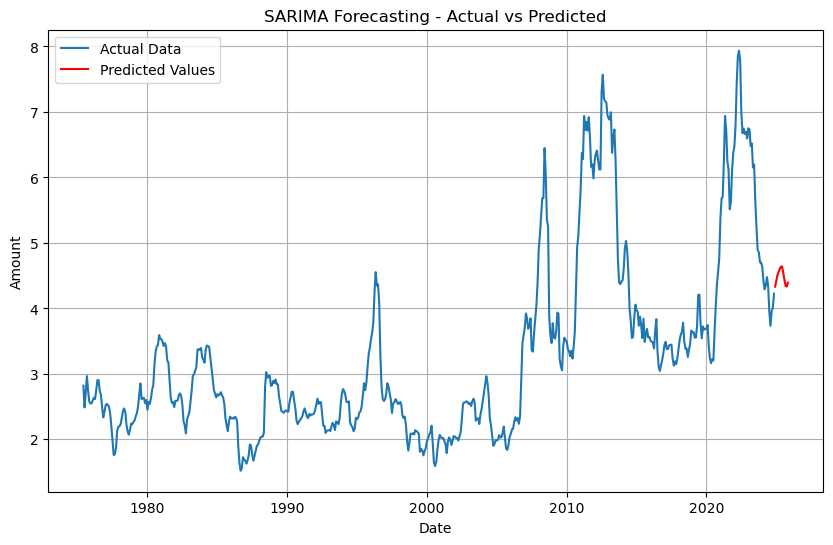

In [202]:
# Convert PeriodIndex to DatetimeIndex
if isinstance(dollars_per_bushel_aggregated.index, pd.PeriodIndex):
    dollars_per_bushel_aggregated.index = dollars_per_bushel_aggregated.index.to_timestamp()
predicted_values.index = pd.date_range(start=dollars_per_bushel_aggregated.index[-1], periods=12, freq='M')
import matplotlib.pyplot as plt

# Ensure indexes are in datetime format
if isinstance(dollars_per_bushel_aggregated.index, pd.PeriodIndex):
    dollars_per_bushel_aggregated.index = dollars_per_bushel_aggregated.index.to_timestamp()

predicted_values.index = pd.date_range(start=dollars_per_bushel_aggregated.index[-1], periods=12, freq='M')

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))

# Actual data plot
plt.plot(dollars_per_bushel_aggregated.index, dollars_per_bushel_aggregated['Amount'], label='Actual Data')

# Predicted values plot
plt.plot(predicted_values.index, predicted_values, label='Predicted Values', color='red')

# Customize the plot
plt.legend()
plt.title("SARIMA Forecasting - Actual vs Predicted")
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)

# Show the plot
plt.show()


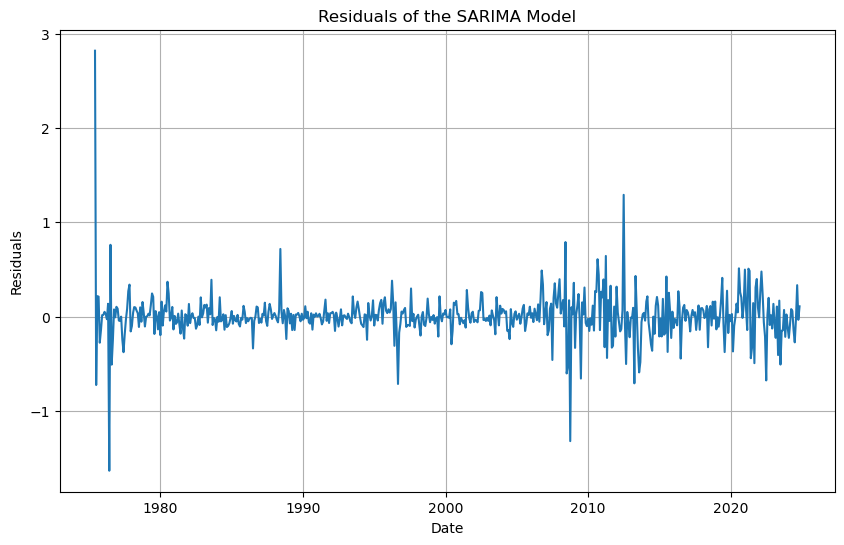

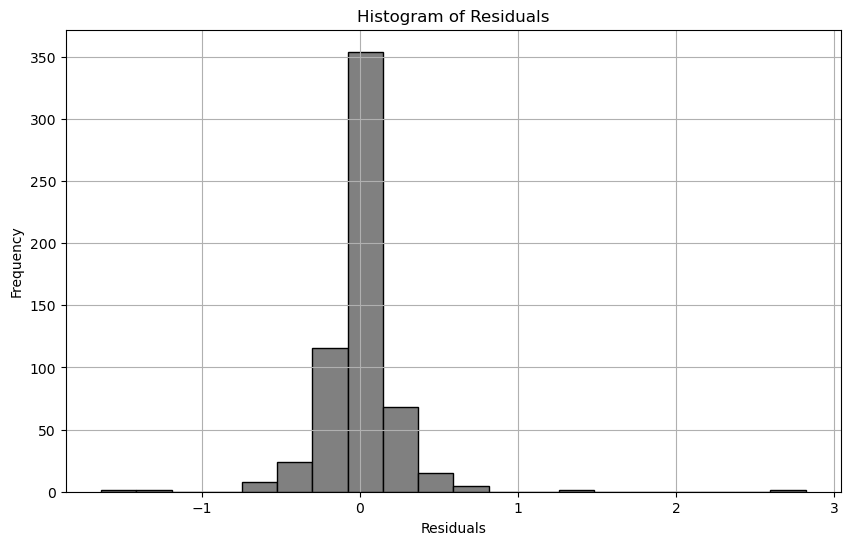

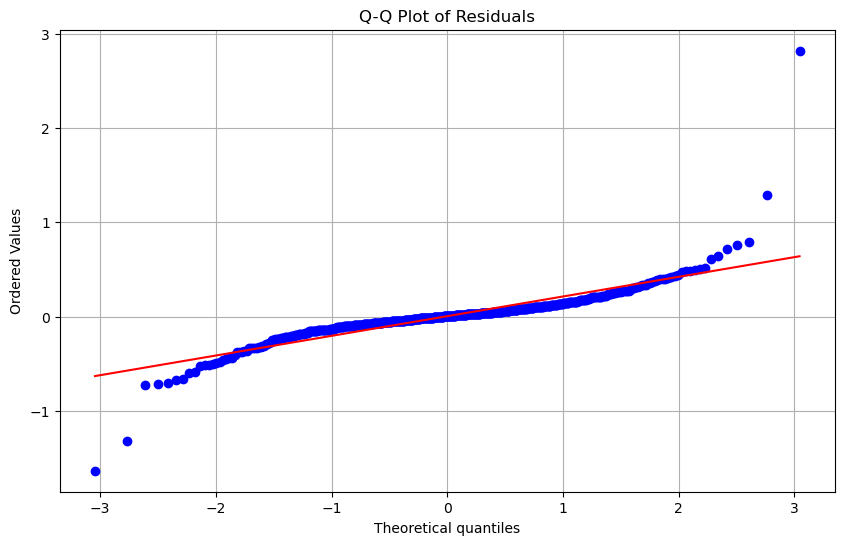

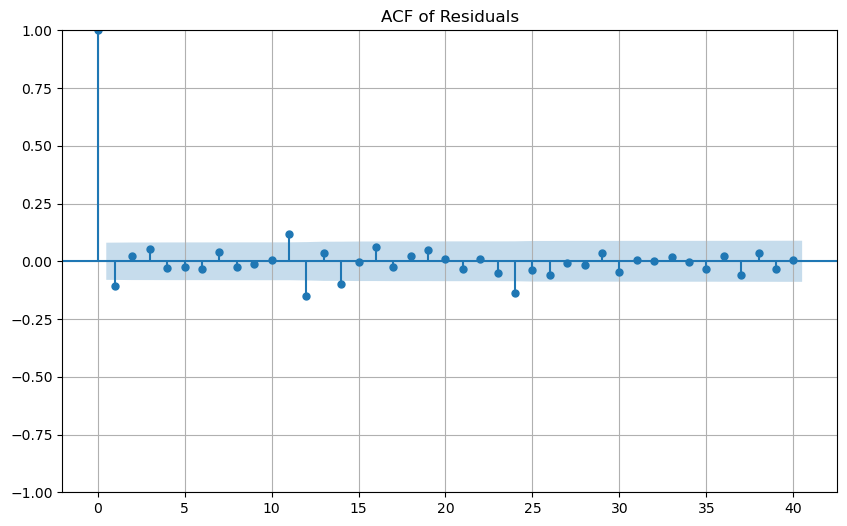

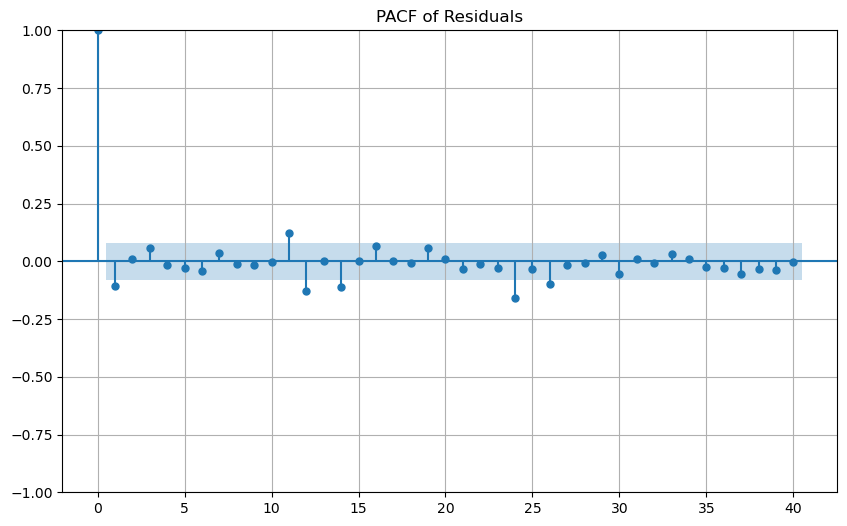

In [170]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Get the residuals
residuals = sarima_result.resid

# Convert index to datetime if it's in Period format
if isinstance(residuals.index, pd.PeriodIndex):
    residuals.index = residuals.index.to_timestamp()

# Step 1: Plot the residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals.index, residuals)
plt.title('Residuals of the SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Step 2: Histogram of the residuals to check for normality
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, color='gray', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 3: Q-Q plot for normality
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()

# Step 4: ACF and PACF of residuals to check for autocorrelation

# ACF plot
plt.figure(figsize=(10, 6))
plot_acf(residuals, lags=40, ax=plt.gca())
plt.title('ACF of Residuals')
plt.grid(True)
plt.show()

# PACF plot
plt.figure(figsize=(10, 6))
plot_pacf(residuals, lags=40, ax=plt.gca())
plt.title('PACF of Residuals')
plt.grid(True)
plt.show()


In [180]:
# Reset index to make sure they align properly
actual_values = actual_values.reset_index(drop=True)
predicted_values = predicted_values.reset_index(drop=True)

# Create mask for non-zero actual values
mask = np.abs(actual_values) > 1e-5

# Apply the mask to both actual and predicted values
safe_actual_values = actual_values[mask]
safe_predicted_values = predicted_values[mask]

# Calculate MAPE
mape = np.mean(np.abs((safe_actual_values - safe_predicted_values) / safe_actual_values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


NameError: name 'actual_values' is not defined

In [178]:
import numpy as np
import pandas as pd

# Ensure actual and predicted values exist (replace with actual data if needed)
# Example: If these values are from SARIMA model predictions
# actual_values = df['actual_column']
# predicted_values = sarima_result.fittedvalues

# Convert to Pandas Series if necessary
actual_values = pd.Series(actual_values) if not isinstance(actual_values, pd.Series) else actual_values
predicted_values = pd.Series(predicted_values) if not isinstance(predicted_values, pd.Series) else predicted_values

# Reset index to ensure they align properly
actual_values = actual_values.reset_index(drop=True)
predicted_values = predicted_values.reset_index(drop=True)

# Create mask for non-zero actual values
mask = np.abs(actual_values) > 1e-5

# Apply the mask to both actual and predicted values
safe_actual_values = actual_values[mask]
safe_predicted_values = predicted_values[mask]

# Ensure both Series are of the same length after filtering
if len(safe_actual_values) != len(safe_predicted_values):
    raise ValueError("Filtered actual and predicted values have different lengths. Check for missing data.")

# Calculate MAPE
mape = np.mean(np.abs((safe_actual_values - safe_predicted_values) / safe_actual_values)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


NameError: name 'actual_values' is not defined

In [188]:
dollars_per_bushel_aggregated

,Year_ID,Amount,Month,Amount_diff
Date,,,,
1975-06-01,1975.0,2.820000,6.0,1.190000
1975-07-01,1975.0,2.486667,7.0,-0.643333
1975-08-01,1975.0,2.706667,8.0,0.243333
1975-09-01,1975.0,2.966154,9.0,0.010769
1975-10-01,1975.0,2.754615,10.0,-0.006154
...,...,...,...,...
2024-07-01,2024.0,3.953000,7.0,0.048000
2024-08-01,2024.0,3.733000,8.0,-0.114000
2024-09-01,2024.0,3.958333,9.0,0.083333


<Figure size 1000x600 with 0 Axes>

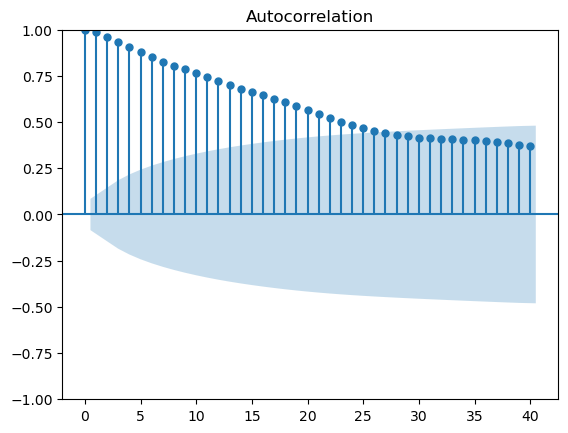

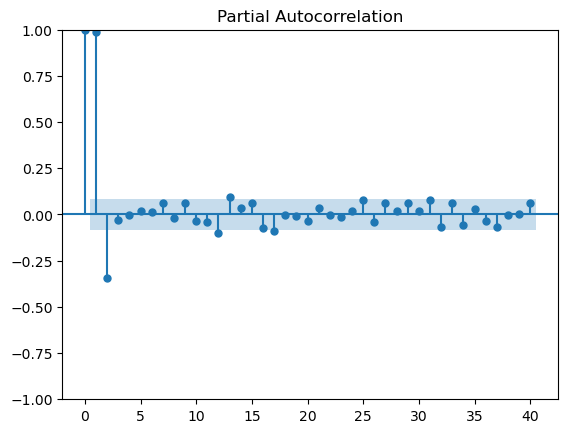

C:\Users\abhin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\abhin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


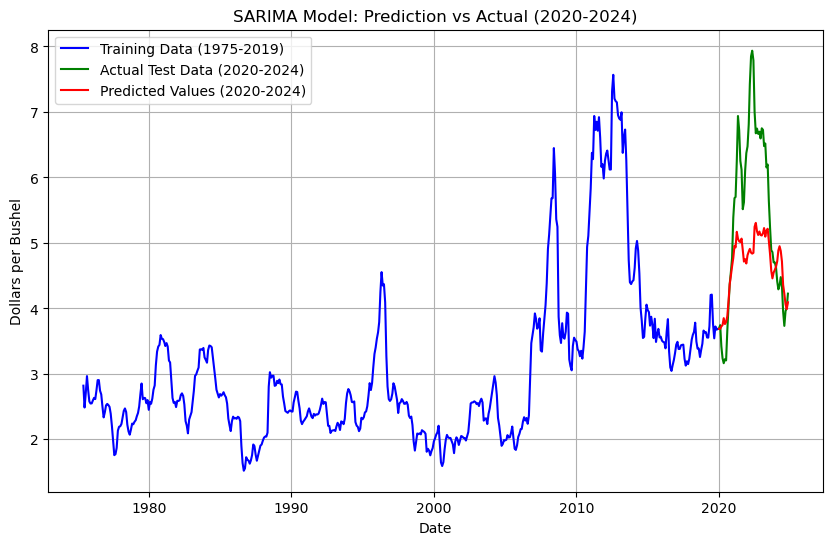

MAPE: 15.191819560973599%


In [222]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Split data into training (1975-2019) and testing (2020-2024)
train_data = dollars_per_bushel_aggregated['Amount']['1975-01-01':'2019-12-01']  # Training data: 1975-2019
test_data = dollars_per_bushel_aggregated['Amount']['2020-01-01':'2024-12-01']  # Test data: 2020-2024

# Step 2: Check for stationarity
# Plotting the ACF and PACF for the training data
plt.figure(figsize=(10, 6))
plot_acf(train_data, lags=40)
plot_pacf(train_data, lags=40)
plt.show()

# Step 3: Fit the SARIMA model
sarima_model = SARIMAX(train_data,
                       order=(5, 2, 1),  # AR, I, MA orders based on ACF/PACF analysis
                       seasonal_order=(1, 1, 1, 120))  # Seasonal order (adjust if needed)
sarima_result = sarima_model.fit(disp=False)

# Step 4: Forecast the values for 2020-2024
forecast_values = sarima_result.get_forecast(steps=len(test_data)).predicted_mean

# Step 5: Plot the comparison of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data (1975-2019)', color='blue')
plt.plot(test_data.index, test_data, label='Actual Test Data (2020-2024)', color='green')
plt.plot(test_data.index, forecast_values, label='Predicted Values (2020-2024)', color='red')
plt.legend()
plt.title('SARIMA Model: Prediction vs Actual (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Dollars per Bushel')
plt.grid(True)
plt.show()

# Step 6: Calculate error metrics like MAPE
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
print(f'MAPE: {mape}%')

# # Step 7: Check residuals of the model
# residuals = sarima_result.resid
# plt.figure(figsize=(10, 6))
# plt.plot(residuals)
# plt.title('Residuals from SARIMA Model')
# plt.grid(True)
# plt.show()

# Optional: Use AutoARIMA to search for best parameters automatically
# from pmdarima import auto_arima
# model_auto = auto_arima(train_data, seasonal=True, m=12, stepwise=True, trace=True)
# print(model_auto.summary())


<Figure size 1000x600 with 0 Axes>

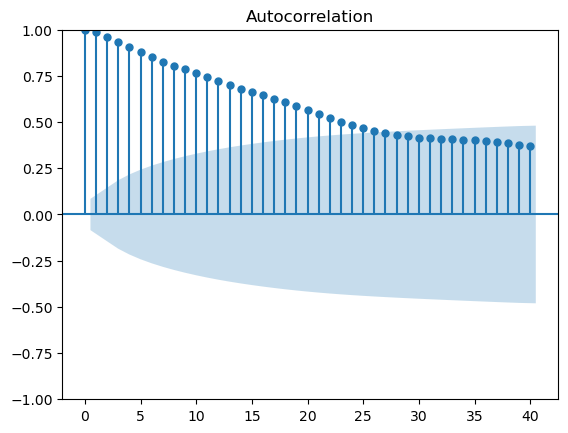

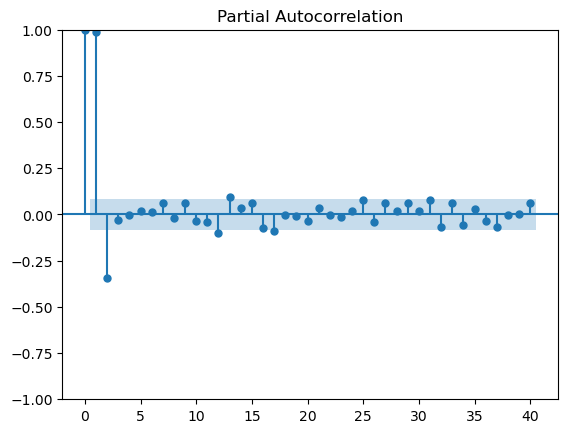

C:\Users\abhin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


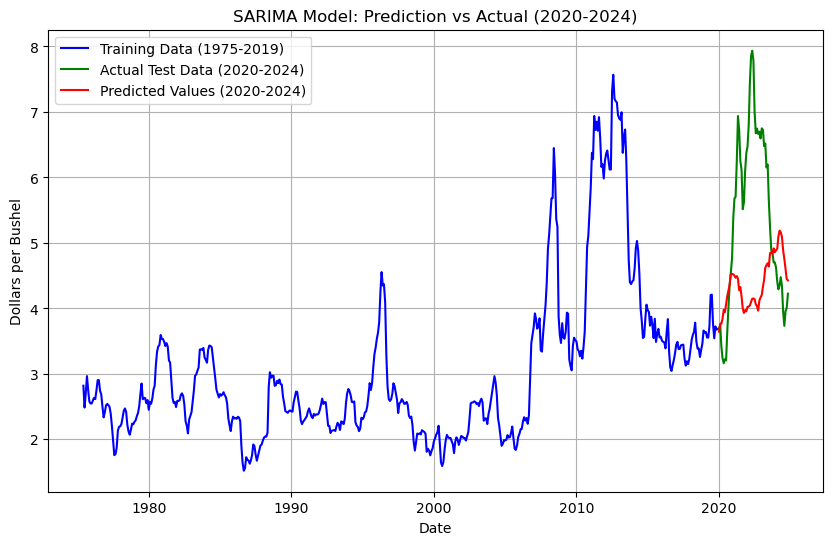

MAPE: 23.272337471809344%


In [224]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Split data into training (1975-2019) and testing (2020-2024)
train_data = dollars_per_bushel_aggregated['Amount']['1975-01-01':'2019-12-01']  # Training data: 1975-2019
test_data = dollars_per_bushel_aggregated['Amount']['2020-01-01':'2024-12-01']  # Test data: 2020-2024

# Step 2: Check for stationarity
# Plotting the ACF and PACF for the training data
plt.figure(figsize=(10, 6))
plot_acf(train_data, lags=40)
plot_pacf(train_data, lags=40)
plt.show()

# Step 3: Fit the SARIMA model
sarima_model = SARIMAX(train_data,
                       order=(5, 2, 1),  # AR, I, MA orders based on ACF/PACF analysis
                       seasonal_order=(1, 1, 1, 120))  # Seasonal order (adjust if needed)
sarima_result = sarima_model.fit(disp=False)

# Step 4: Forecast the values for 2020-2024
forecast_values = sarima_result.get_forecast(steps=len(test_data)).predicted_mean

# Step 5: Plot the comparison of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data (1975-2019)', color='blue')
plt.plot(test_data.index, test_data, label='Actual Test Data (2020-2024)', color='green')
plt.plot(test_data.index, forecast_values, label='Predicted Values (2020-2024)', color='red')
plt.legend()
plt.title('SARIMA Model: Prediction vs Actual (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Dollars per Bushel')
plt.grid(True)
plt.show()

# Step 6: Calculate error metrics like MAPE
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
print(f'MAPE: {mape}%')

# # Step 7: Check residuals of the model
# residuals = sarima_result.resid
# plt.figure(figsize=(10, 6))
# plt.plot(residuals)
# plt.title('Residuals from SARIMA Model')
# plt.grid(True)
# plt.show()

# Optional: Use AutoARIMA to search for best parameters automatically
# from pmdarima import auto_arima
# model_auto = auto_arima(train_data, seasonal=True, m=12, stepwise=True, trace=True)
# print(model_auto.summary())


<Figure size 1000x600 with 0 Axes>

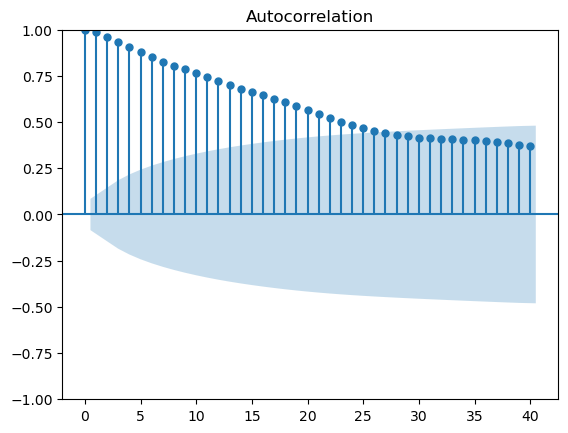

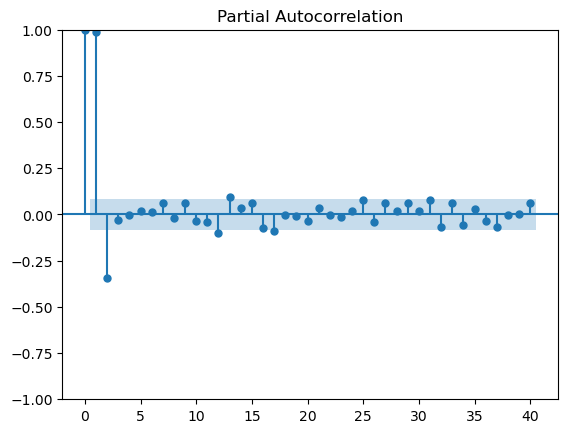

C:\Users\abhin\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\abhin\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


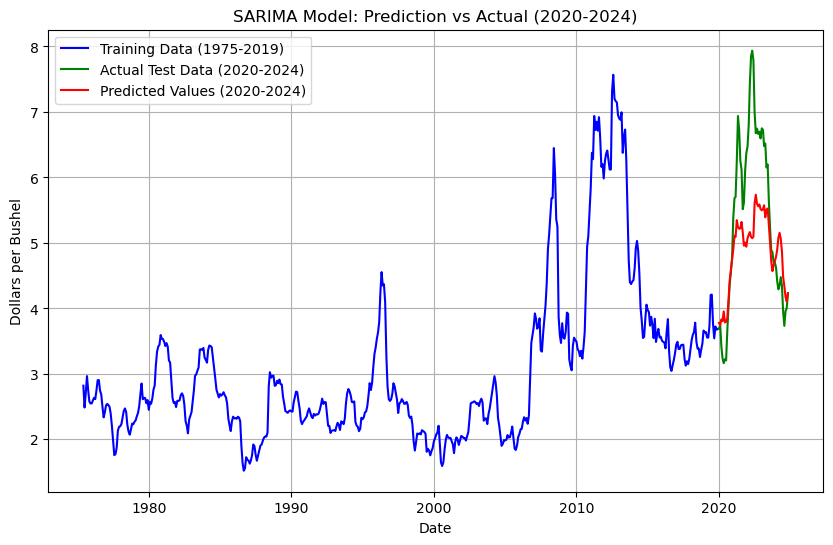

MAPE: 13.401003584981023%


In [250]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Split data into training (1975-2019) and testing (2020-2024)
train_data = dollars_per_bushel_aggregated['Amount']['1975-01-01':'2019-12-01']  # Training data: 1975-2019
test_data = dollars_per_bushel_aggregated['Amount']['2020-01-01':'2024-12-01']  # Test data: 2020-2024

# Step 2: Check for stationarity
# Plotting the ACF and PACF for the training data
plt.figure(figsize=(10, 6))
plot_acf(train_data, lags=40)
plot_pacf(train_data, lags=40)
plt.show()

# Step 3: Fit the SARIMA model
sarima_model = SARIMAX(train_data,
                       order=(7, 2, 3),  # AR, I, MA orders based on ACF/PACF analysis
                       seasonal_order=(1, 1, 1, 120))  # Seasonal order (adjust if needed)
sarima_result = sarima_model.fit(disp=False)

# Step 4: Forecast the values for 2020-2024
forecast_values = sarima_result.get_forecast(steps=len(test_data)).predicted_mean

# Step 5: Plot the comparison of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Training Data (1975-2019)', color='blue')
plt.plot(test_data.index, test_data, label='Actual Test Data (2020-2024)', color='green')
plt.plot(test_data.index, forecast_values, label='Predicted Values (2020-2024)', color='red')
plt.legend()
plt.title('SARIMA Model: Prediction vs Actual (2020-2024)')
plt.xlabel('Date')
plt.ylabel('Dollars per Bushel')
plt.grid(True)
plt.show()

# Step 6: Calculate error metrics like MAPE
mape = np.mean(np.abs((test_data - forecast_values) / test_data)) * 100
print(f'MAPE: {mape}%')

# # Step 7: Check residuals of the model
# residuals = sarima_result.resid
# plt.figure(figsize=(10, 6))
# plt.plot(residuals)
# plt.title('Residuals from SARIMA Model')
# plt.grid(True)
# plt.show()

# Optional: Use AutoARIMA to search for best parameters automatically
# from pmdarima import auto_arima
# model_auto = auto_arima(train_data, seasonal=True, m=12, stepwise=True, trace=True)
# print(model_auto.summary())
